In [1]:
!pip install pyodbc pandas


In [3]:
import pyodbc
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib



In [13]:
# Define your connection string
conn_string = (
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=DESKTOP-AUBSJCA;"  
    "DATABASE=db_Churn;"
    "Trusted_Connection=yes;"

)

# Create a connection
conn = pyodbc.connect(conn_string)

# Define a query
query = "SELECT * FROM vm_ChurnData;"  

# Execute the query and fetch data into a DataFrame
df = pd.read_sql(query, conn)

# Display the DataFrame
df.head()




C:\Users\5g\AppData\Local\Temp\ipykernel_22084\4099909805.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11098-MAD,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,...,Bank Withdrawal,95.099998,6683.399902,0.00,0,631.719971,7315.120117,Stayed,Others,Others
1,11114-PUN,Male,51,No,Punjab,5,9,Deal 5,Yes,No,...,Bank Withdrawal,49.150002,169.050003,0.00,10,122.370003,301.420013,Churned,Competitor,Competitor had better devices
2,11167-WES,Female,43,Yes,West Bengal,3,28,Deal 1,Yes,Yes,...,Bank Withdrawal,116.050003,8297.500000,42.57,110,1872.979980,10237.910156,Stayed,Others,Others
3,11179-MAH,Male,35,No,Maharashtra,10,12,None,Yes,No,...,Credit Card,84.400002,5969.299805,0.00,0,219.389999,6188.689941,Stayed,Others,Others
4,11180-TAM,Male,75,Yes,Tamil Nadu,12,27,Deal 2,Yes,No,...,Credit Card,72.599998,4084.350098,0.00,140,332.079987,4556.430176,Stayed,Others,Others


#### Data preprocessing 

In [14]:
#Drop columns that wan't be used for prediction
df = df.drop(['Customer_ID','Churn_Category','Churn_Reason'],axis=1)

In [15]:
# columns to be label encoded 
columns_to_encode = [

    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'

]

In [16]:
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [18]:
df["Customer_Status"] = df["Customer_Status"].map({'Stayed':0,'Churned':1})

In [19]:
# split data into features & target 
x = df.drop('Customer_Status',axis=1)
y = df['Customer_Status']

In [20]:
# split data into training and testing 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### Train Random Forest Model

In [21]:
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

### Evaluate Model

In [22]:
# Make predictions
y_perd = rf_model.predict(x_test)

In [23]:
#Evaluate the maodel
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_perd))
print("\nClassification Report:")
print(classification_report(y_test,y_perd))

Confusion Matrix:
[[810  53]
 [120 219]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       863
           1       0.81      0.65      0.72       339

    accuracy                           0.86      1202
   macro avg       0.84      0.79      0.81      1202
weighted avg       0.85      0.86      0.85      1202



In [25]:
importances = rf_model.feature_importances_
indices = np.argsort(importances[::-1])

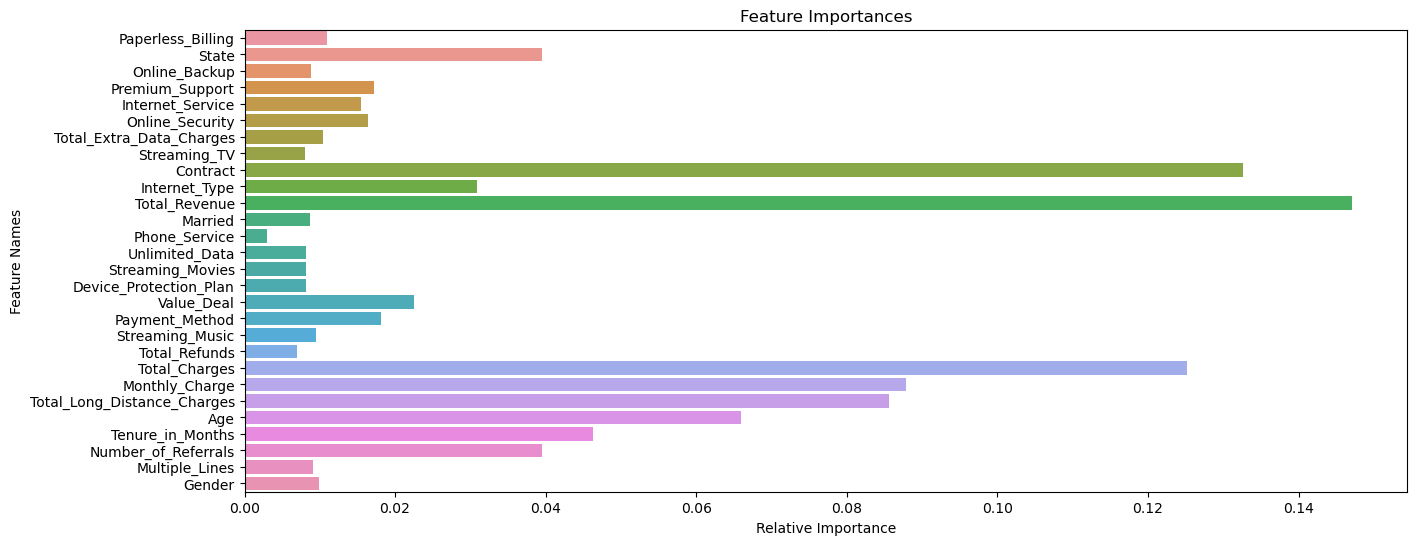

In [27]:
# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=x.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')

plt.show()

### Use Model for Prediction on New Data

In [28]:
query2 = "SELECT * FROM vm_JoinedData;"
new_data = pd.read_sql(query2, conn)
new_data.head()

C:\Users\5g\AppData\Local\Temp\ipykernel_22084\419393735.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  new_data = pd.read_sql(query2, conn)


,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,12056-WES,Male,27,No,West Bengal,2,20,None,Yes,No,...,Bank Withdrawal,90.400002,268.450012,0.0,0,94.440002,362.890015,Joined,Others,Others
1,12136-RAJ,Female,25,Yes,Rajasthan,2,35,None,Yes,No,...,Bank Withdrawal,19.900000,19.900000,0.0,0,11.830000,31.730000,Joined,Others,Others
2,12257-ASS,Female,39,No,Assam,9,1,None,Yes,No,...,Credit Card,19.549999,19.549999,0.0,0,10.200000,29.750000,Joined,Others,Others
3,15349-UTT,Male,47,Yes,Uttar Pradesh,9,12,Deal 5,Yes,Yes,...,Bank Withdrawal,50.150002,50.150002,0.0,0,39.869999,90.019997,Joined,Others,Others
4,15591-KAR,Female,26,No,Karnataka,3,31,None,Yes,No,...,Credit Card,20.400000,20.400000,0.0,0,45.910000,66.309998,Joined,Others,Others


In [29]:
original_data = new_data.copy()

In [30]:
customer_ids = new_data['Customer_ID']

In [31]:
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

In [32]:
for column in new_data.select_dtypes(include=['object']).columns:

    new_data[column] = label_encoders[column].transform(new_data[column])

In [33]:
new_predictions = rf_model.predict(new_data)

In [34]:
original_data['Customer_Status_Predicted'] = new_predictions

In [35]:
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

In [36]:

from sqlalchemy import create_engine

# Creating a SQLAlchemy engine for SQL Server
engine = create_engine('mssql+pyodbc://DESKTOP-AUBSJCA/db_Churn?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes')
# Save the predictions to a new SQL table or append to an existing one
original_data[['Customer_ID', 'Customer_Status_Predicted']].to_sql('Churn_Predictions', engine, if_exists='replace', index=False)
print("Predictions saved to SQL table successfully.")

# Close the database connection
conn.close()


Predictions saved to SQL table successfully.
